 # Notes and exercises from Nielsen2015
 ---

 ## Ch. 1.1 - Perceptrons

 $ y =
   \begin{cases}
       0 & \text{if } \sum_i w_i x_i \geq \text{threshold} \\
       1 & \text{if } \sum_i w_i x_i < \text{threshold}
   \end{cases} $

 where $y = \text{output}$, $x_i = \text{input}$, and $w_i = \text{weights}$

 Rewrite conditions as $\boldsymbol{w} \cdot \boldsymbol{x} + b \leq 0$, $> 0$
 where $b = -\text{threshold}$ is the 'bias'.

 Perceptrons can be combined to give $\text{AND}, \text{OR}, \text{NAND}$, etc.
 and perform any basic computation.

 ## Ch. 1.2 - Logistic/Sigmoid Neurons

 To optimize $w_i$, $\text{output}$ should not be a piecewise-defined function.
 Redefine using the 'logistic' or 'sigmoid' function $\sigma(z) = \frac{1}{1 + \mathrm{e}^{-z}}$
 where $z = \boldsymbol{w} \cdot \boldsymbol{x} + b$.

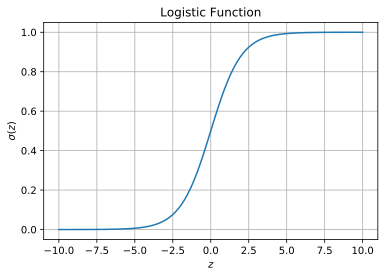

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 100)
f = 1/(1 + np.exp(-z))

plt.plot(z, f)
plt.xlabel('$z$')
plt.ylabel('$\sigma(z)$')
plt.title('Logistic Function')
plt.rc('grid', linestyle = '--', color = 'gray')
plt.grid(True)
plt.show()
